# Question 1.

### (a) **What type of problem does a Classification Decision Tree address, and what are some real-world applications?**

A **Classification Decision Tree** is a supervised learning algorithm designed to solve **classification problems**, where the goal is to predict the **category** or **class** of an input based on its features. It works by recursively splitting the data into subsets based on feature values to create a tree-like structure that leads to a classification decision.

#### Examples of Real-World Applications:
1. **Medical Diagnosis**: Determining if a patient has a certain disease (e.g., diabetes) based on clinical parameters like glucose levels, BMI, and age.
2. **Spam Filtering**: Classifying emails as "spam" or "not spam" based on features like the presence of specific keywords, sender reputation, and email length.
3. **Credit Scoring**: Deciding whether to approve a loan application by classifying applicants as "high risk" or "low risk" based on financial history, income, and credit score.
4. **Fraud Detection**: Identifying fraudulent transactions by analyzing patterns like transaction amount, location, and frequency.
5. **Customer Segmentation**: Grouping customers into categories such as "loyal" or "at-risk" based on purchase history, demographic data, and browsing behavior.

---

### (b) **How does a Classification Decision Tree make predictions versus Multiple Linear Regression?**

#### **Classification Decision Tree**:
- **Goal**: Predicts a **category** or **class** (e.g., "Yes" or "No", "A", "B", or "C").
- **Mechanism**: 
  - Splits the dataset into subsets based on the value of a feature at each node (e.g., "Age > 30?" or "Income < 50k?").
  - Each split aims to maximize **purity** (i.e., make each subset more homogeneous in terms of class labels).
  - Follows the path of splits (from root to leaf) to assign a class label to an input.
- **Example**: Predicting whether a patient has a disease ("Yes" or "No") based on medical test results.

#### **Multiple Linear Regression**:
- **Goal**: Predicts a **continuous numeric value** (e.g., housing prices, temperatures).
- **Mechanism**:
  - Estimates a linear relationship between input features (independent variables) and the output (dependent variable).
  - Outputs a prediction by summing up weighted contributions of each feature, plus an intercept.
- **Example**: Predicting house prices based on square footage, number of bedrooms, and location.

#### **Key Difference**:
- **Nature of Prediction**:
  - Decision Tree: **Categorical** output (e.g., "Class A", "Class B").
  - Regression: **Continuous** output (e.g., 150,000 dollars).
- **How Decisions are Made**:
  - Decision Tree: Uses a set of **if-else rules** derived from feature thresholds.
  - Regression: Calculates a **numeric estimate** using a linear formula. 
  
---

# Question 2.


#### **1. Accuracy**:  
**Scenario**: Diagnosing a general health condition in the population.  
**Rationale**: Accuracy is most appropriate when the costs of false positives (FP) and false negatives (FN) are relatively equal, and the classes in the dataset are balanced. For example, determining whether individuals have a common condition like the flu may rely on accuracy since there isn’t a disproportionate risk associated with misclassification.  

#### **2. Sensitivity (Recall)**:  
**Scenario**: Screening for a life-threatening disease (e.g., cancer detection).  
**Rationale**: Sensitivity is critical when identifying as many actual positives as possible is essential. Missing a true positive (FN) in this case, such as failing to detect cancer in a patient, can have severe consequences. High sensitivity ensures that very few actual cases are missed, even if it means more false alarms (FP).  

#### **3. Specificity**:  
**Scenario**: Determining eligibility for an expensive or invasive treatment (e.g., a rare experimental surgery).  
**Rationale**: Specificity is important when minimizing false positives is crucial, such as avoiding unnecessary costs or procedures for individuals who do not need the treatment. High specificity ensures that individuals who do not meet the criteria are correctly excluded.  

#### **4. Precision**:  
**Scenario**: Fraud detection in financial transactions.  
**Rationale**: Precision is valuable when the cost of false positives is high. For instance, falsely flagging legitimate transactions as fraud could inconvenience customers and damage trust. High precision ensures that when a transaction is flagged as fraudulent, it is highly likely to actually be fraudulent, reducing unnecessary interventions.  

---  


# Question 3. 

In [5]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above
df = pd.DataFrame(ab)

df.describe()

,List Price,Amazon Price,NumPages,Pub year,Height,Width,Thick,Weight_oz
count,324.000000,325.000000,323.000000,324.000000,321.000000,320.000000,324.000000,316.000000
mean,18.579753,13.333846,335.857585,2002.206790,8.163240,5.585000,0.907716,12.487975
std,14.252829,13.727679,161.984389,10.629002,0.918739,0.874057,0.368625,6.644648
min,1.500000,0.770000,24.000000,1936.000000,5.100000,4.100000,0.100000,1.200000
25%,13.950000,8.600000,208.000000,1998.000000,7.900000,5.200000,0.600000,7.800000
50%,15.000000,10.200000,320.000000,2005.000000,8.100000,5.400000,0.900000,11.200000
75%,19.950000,13.130000,416.000000,2010.000000,8.500000,5.900000,1.100000,16.000000
max,139.950000,139.950000,896.000000,2011.000000,12.100000,9.500000,2.100000,35.200000


In [6]:
df.drop('Height', axis=1, inplace=True)
df.drop('Width', axis=1, inplace=True)
df.drop('Weight_oz', axis=1, inplace=True)
df = df.dropna()  # Remove rows with NaN values
df['Pub year'] = df['Pub year'].astype(int)  # Convert to integer
df['NumPages'] = df['NumPages'].astype(int)  # Convert to integer
df['Hard_or_Paper'] = df['Hard_or_Paper'].astype('category')  # Convert to category
df.describe()

,List Price,Amazon Price,NumPages,Pub year,Thick
count,319.000000,319.000000,319.000000,319.000000,319.000000
mean,18.362978,12.941034,334.272727,2002.175549,0.903448
std,13.976755,12.436673,161.601510,10.646133,0.365261
min,1.500000,0.770000,24.000000,1936.000000,0.100000
25%,13.890000,8.600000,208.000000,1998.000000,0.600000
50%,15.000000,10.200000,320.000000,2005.000000,0.900000
75%,19.360000,12.560000,416.000000,2010.000000,1.100000
max,139.950000,139.950000,896.000000,2011.000000,2.100000


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 0 to 324
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Title          319 non-null    object  
 1   Author         319 non-null    object  
 2   List Price     319 non-null    float64 
 3   Amazon Price   319 non-null    float64 
 4   Hard_or_Paper  319 non-null    category
 5   NumPages       319 non-null    int64   
 6   Publisher      319 non-null    object  
 7   Pub year       319 non-null    int64   
 8   ISBN-10        319 non-null    object  
 9   Thick          319 non-null    float64 
dtypes: category(1), float64(3), int64(2), object(4)
memory usage: 25.4+ KB
None

Summary Statistics:
       List Price  Amazon Price    NumPages     Pub year       Thick
count  319.000000    319.000000  319.000000   319.000000  319.000000
mean    18.362978     12.941034  334.272727  2002.175549    0.903448
std     13.976755     12.436673  

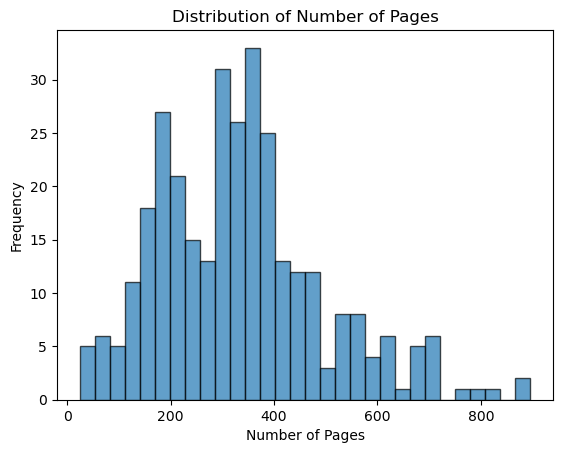

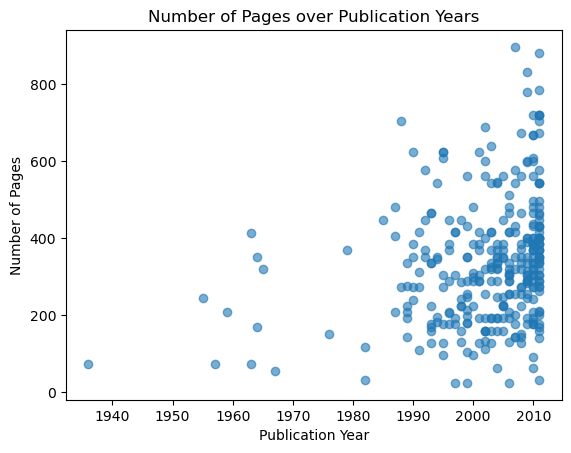

In [7]:
# EDA and Summary
print("Dataset Overview:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

# Frequency count for 'Hard_or_Paper'
print("\nHard_or_Paper Frequency Count:")
print(df['Hard_or_Paper'].value_counts())

# Plot distribution of 'NumPages'
plt.hist(df['NumPages'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Number of Pages')
plt.xlabel('Number of Pages')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of 'NumPages' vs 'Pub year'
plt.scatter(df['Pub year'], df['NumPages'], alpha=0.6)
plt.title('Number of Pages over Publication Years')
plt.xlabel('Publication Year')
plt.ylabel('Number of Pages')
plt.show()

# Question 4.
### Step 1: Creating the 80/20 train_test split

In [8]:
from sklearn.model_selection import train_test_split

# Split the data
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    df, test_size=0.2, random_state=42
)

# Report the number of observations
print(f"Training set size: {len(ab_reduced_noNaN_train)}")
print(f"Testing set size: {len(ab_reduced_noNaN_test)}")

Training set size: 255
Testing set size: 64


---
#### **Explanation of the two steps**:
1. **`y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']`**:
   - This step converts the categorical variable `Hard_or_Paper` into a binary numeric variable using one-hot encoding. The `'H'` column represents whether a book is a hardcover (1) or not (0).

2. **`X = ab_reduced_noNaN[['List Price']]`**:
   - This step selects the `List Price` feature (a single predictor variable) from the dataset. This feature will be used as the independent variable (X) to predict the target variable (`y`).
---
### Step 2: Train a Classification Tree Model
Use `DecisionTreeClassifier` with a maximum depth of 2 to fit the model. The `List Price` feature will be used to predict the `Hard_or_Paper` variable.

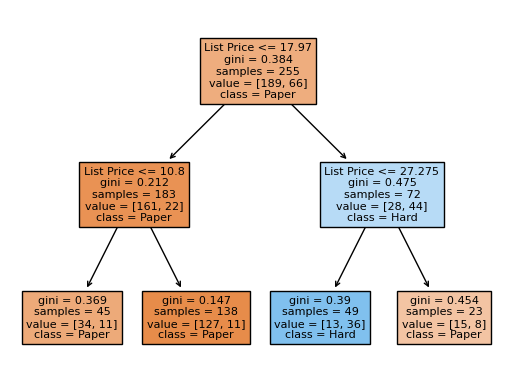

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Prepare features and target
y = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']
X = ab_reduced_noNaN_train[['List Price']]

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X, y)

# Visualize the tree
tree.plot_tree(clf, feature_names=['List Price'], class_names=['Paper', 'Hard'], filled=True)
plt.show()

### Step 3: Explanation of Predictions from the Fitted Model
The decision tree splits the data based on the `List Price` variable into two or more decision nodes. 

1. **At each split**:
   - A threshold for `List Price` is chosen to maximize classification performance (e.g., reducing misclassification).
   - The tree continues splitting until the specified `max_depth` is reached.

2. **Leaf nodes**:
   - Each leaf represents a final prediction for whether the book is a hardcover (`Hard`) or paperback (`Paper`), based on the majority class in that node.

---

### ChatBot Summary of Interactions

1. **Classification Decision Tree**:
   - Explored the type of problems Classification Decision Trees address, with real-world examples (e.g., medical diagnosis, fraud detection).  
   - Compared how Decision Trees make predictions (classification) versus Multiple Linear Regression (regression).  

2. **Evaluation Metrics**:
   - Discussed real-world applications of accuracy, sensitivity, specificity, and precision, with examples like disease detection (sensitivity) and fraud detection (precision).

3. **Amazon Books Dataset**:
   - Pre-processed the dataset by removing unnecessary columns, dropping rows with NaN values, and setting appropriate data types (`Pub year` and `NumPages` as integers; `Hard_or_Paper` as categorical).  
   - Conducted initial exploratory data analysis (EDA), including summary statistics and visualizations (e.g., distribution of `NumPages`).

4. **Train-Test Split and Decision Tree Model**:
   - Created an 80/20 train-test split for the dataset.  
   - Explained how to prepare the target variable (`y`) and features (`X`) for fitting a `scikit-learn` DecisionTreeClassifier model.  
   - Trained a classification tree using `List Price` to predict `Hard_or_Paper` with `max_depth=2`, visualized using `tree.plot_tree(clf)`.  
   - Explained the tree's predictions based on splits in `List Price`. 

# Question 5.

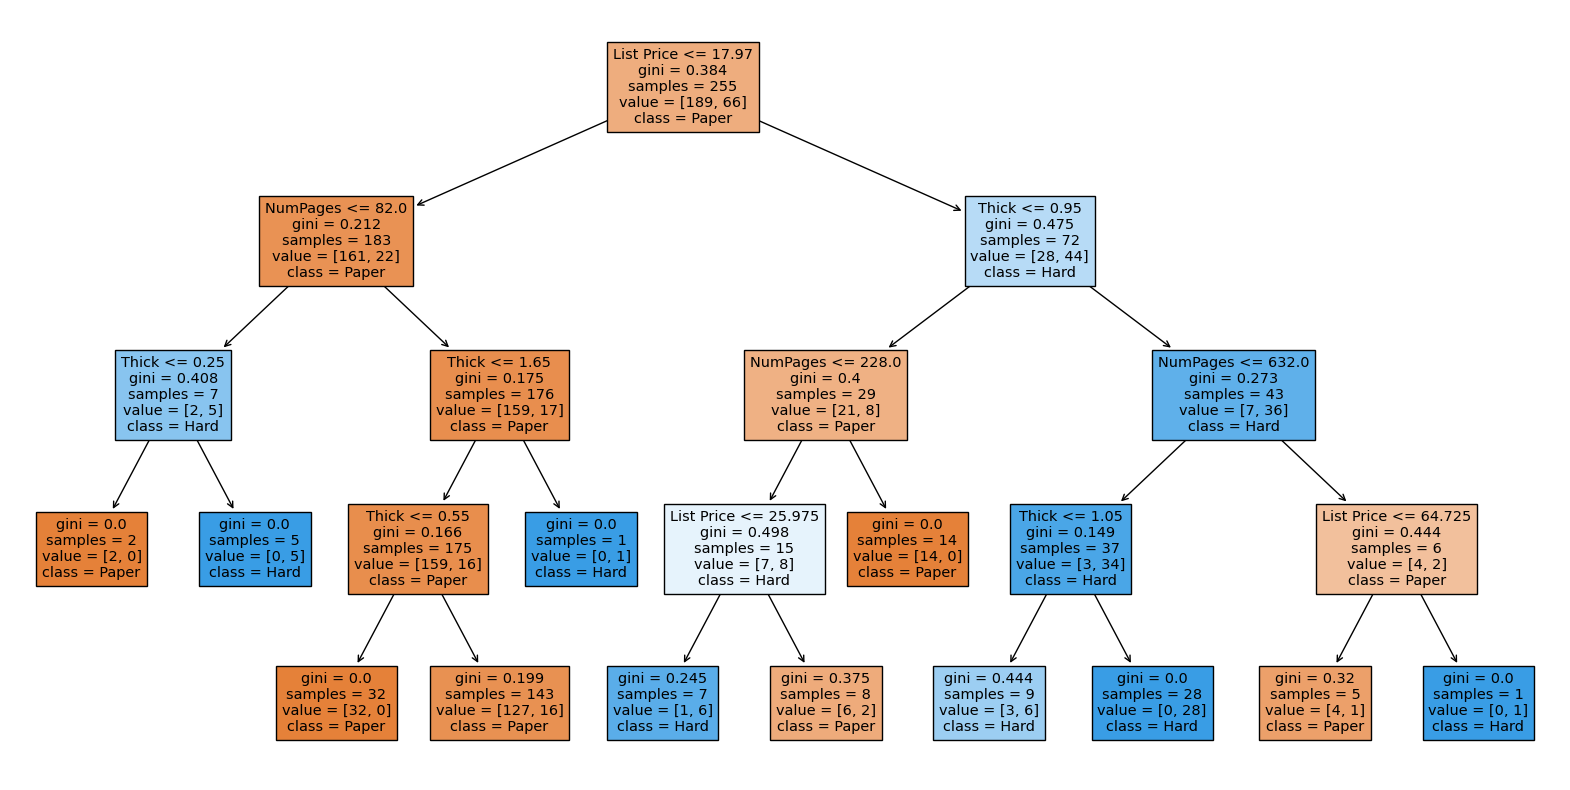

In [14]:
# Prepare features and target for the new model
X = ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]
y = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']
# Train Decision Tree Classifier with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X, y)

# Visualize the tree
plt.figure(figsize=(20, 10))
tree.plot_tree(clf2, feature_names=['NumPages', 'Thick', 'List Price'], 
               class_names=['Paper', 'Hard'], filled=True)
plt.show()


# Question 6.

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Prepare test features and target
X_test_clf = ab_reduced_noNaN_test[['List Price']]  # For clf
X_test_clf2 = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]  # For clf2
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']

# Predictions
y_pred_clf = clf.predict(X_test_clf)
y_pred_clf2 = clf2.predict(X_test_clf2)

# Confusion matrices
cm_clf = confusion_matrix(y_test, y_pred_clf)
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)

print("Confusion Matrix for clf:")
print(cm_clf)
print("\nConfusion Matrix for clf2:")
print(cm_clf2)

# Metrics calculation function
def calculate_metrics(cm):
    TN, FP, FN, TP = cm.ravel()
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    return sensitivity, specificity, accuracy

# Calculate metrics for clf
sensitivity_clf, specificity_clf, accuracy_clf = calculate_metrics(cm_clf)

# Calculate metrics for clf2
sensitivity_clf2, specificity_clf2, accuracy_clf2 = calculate_metrics(cm_clf2)

# Report metrics
print("\nMetrics for clf:")
print(f"Sensitivity: {sensitivity_clf:.2f}")
print(f"Specificity: {specificity_clf:.2f}")
print(f"Accuracy: {accuracy_clf:.2f}")

print("\nMetrics for clf2:")
print(f"Sensitivity: {sensitivity_clf2:.2f}")
print(f"Specificity: {specificity_clf2:.2f}")
print(f"Accuracy: {accuracy_clf2:.2f}")

Confusion Matrix for clf:
[[40  4]
 [ 6 14]]

Confusion Matrix for clf2:
[[40  4]
 [ 5 15]]

Metrics for clf:
Sensitivity: 0.70
Specificity: 0.91
Accuracy: 0.84

Metrics for clf2:
Sensitivity: 0.75
Specificity: 0.91
Accuracy: 0.86


# Question 7. 

The differences between the two confusion matrices are likely due to the features used to train each model. The first model (`clf`) uses only the `List Price` variable, which might not capture the full complexity of the relationship between the features and the outcome variable (`Hard_or_Paper`). This could lead to a higher rate of misclassifications, as the model is based on a single feature that may not provide sufficient information for accurate predictions.

In contrast, the second model (`clf2`) uses a more comprehensive set of features: `NumPages`, `Thick`, and `List Price`. By incorporating multiple features, the second model has a better chance of capturing more nuances in the data, leading to more accurate predictions and therefore potentially a better confusion matrix. The two confusion matrices for `clf` and `clf2` (in the previous case) are better because they are evaluated on an 80/20 train-test split, which provides a more realistic performance evaluation by separating the training and testing data, reducing overfitting risks that could occur when using the same data for both training and testing.

# Question 8.

To visualize the feature importances for a scikit-learn classification decision tree like `clf2`, we can use the `.feature_importances_` attribute, which provides a measure of the importance of each feature in the model's predictions.

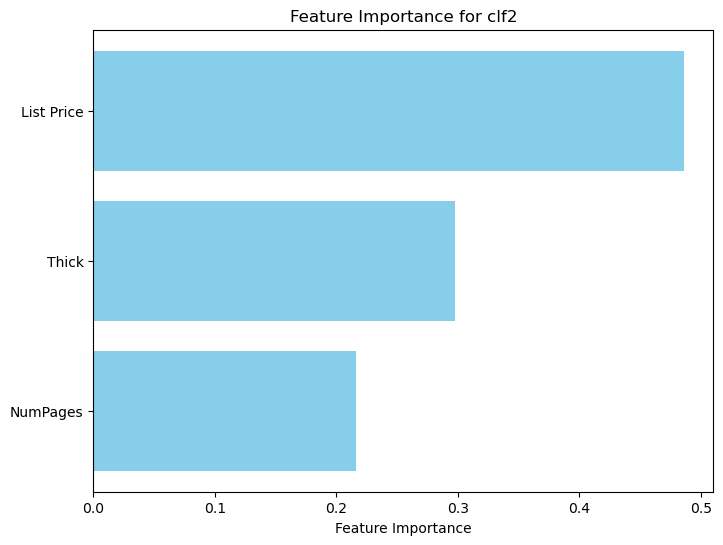

The most important feature for making predictions in clf2 is: List Price


In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Get the feature importances and corresponding feature names
feature_importances = clf2.feature_importances_
feature_names = clf2.feature_names_in_

# Visualize feature importances
plt.figure(figsize=(8, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Feature Importance for clf2")
plt.show()

# Report the most important predictor variable
most_important_feature = feature_names[np.argmax(feature_importances)]
print(f"The most important feature for making predictions in clf2 is: {most_important_feature}")

### Explanation:
- **`clf2.feature_importances_`**: This gives the relative importance of each feature in the decision tree model.
- **`clf2.feature_names_in_`**: This gives the names of the features used to train the decision tree.
- **Visualization**: The bar plot shows the importance of each feature.
- **Most Important Feature**: The `np.argmax(feature_importances)` finds the index of the feature with the highest importance.

This will help you visualize and identify the most important predictor variable in `clf2`.

# Question 9. 

In linear regression, the coefficients directly represent the strength and direction of the relationship between each predictor variable and the target variable, with larger absolute values indicating stronger influences. In contrast, feature importances in decision trees quantify the contribution of each feature to reducing uncertainty or improving the accuracy of predictions at each split, but they don't provide a direct, linear relationship like regression coefficients. While regression coefficients are interpretable in a linear fashion, feature importances in decision trees reflect how valuable each feature is for making decisions throughout the tree's structure, considering interactions and non-linear splits.

# Question 10. 
Somewhat

# Summary:
In our interactions, we discussed key concepts related to classification decision trees, including how to fit and evaluate models using scikit-learn, interpret feature importances, and assess model performance with metrics like sensitivity, specificity, and accuracy. We explored the process of training decision trees using different feature sets, visualizing confusion matrices, and calculating metrics for model evaluation. We also compared the interpretation of coefficients in linear regression versus feature importances in decision trees, highlighting their distinct approaches to understanding predictor variable influence. Finally, we discussed the application of decision tree models to real-world data and their performance in predicting book types based on specific features.